# Creating Data To Use in the Experiments

In [6]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

## Creating MNIST Data

In [ ]:
#Utility functions


# Function to select n_samples for each class
def get_samples_per_class(dataset, n_samples_per_class):
    targets = torch.tensor(dataset.targets)
    indices = torch.arange(len(targets))

    selected_indices = []
    for class_idx in range(10):  # For each class
        class_indices = indices[targets == class_idx][:n_samples_per_class]
        selected_indices.append(class_indices)

    selected_indices = torch.cat(selected_indices)
    return selected_indices



def extract_dataset(dataset):
    images = []
    labels = []
    for image, label in dataset:
        # Convert the image to a NumPy array and normalize it
        image_np = np.array(image) / 255.0
        images.append(image_np)
        labels.append(label)
    return np.array(images), np.array(labels)



In [10]:
### Selecting 10 labelled samples from each class to make a labeled dataset of 100 samples and unlabeled dataset of 9900

# Load MNIST Data
transform = transforms.ToTensor()
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Get 1000 samples of each class
selected_indices = get_samples_per_class(mnist_data, 1000)

# Now split into labeled and unlabeled datasets
n_labeled_per_class = 10  # Number of labeled examples per class
labeled_indices = []
unlabeled_indices = []

for class_idx in range(10):
    class_indices = selected_indices[1000 * class_idx:1000 * (class_idx + 1)]
    labeled_indices.extend(class_indices[:n_labeled_per_class])
    unlabeled_indices.extend(class_indices[n_labeled_per_class:])

labeled_dataset = Subset(mnist_data, labeled_indices)
unlabeled_dataset = Subset(mnist_data, unlabeled_indices)

C:\Users\Sanket\AppData\Local\Temp\ipykernel_10712\2157185890.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(dataset.targets)


In [11]:
### Saving the labeled and unlabeled data at a location to use in the experiments ahead

# Extract data from labeled and unlabeled datasets
labeled_images, labeled_labels = extract_dataset(labeled_dataset)
unlabeled_images, unlabeled_labels = extract_dataset(unlabeled_dataset)  # Labels are not needed for unlabeled data


# Save the datasets as .npz files
np.savez('./Saved_Data/labeled_dataset_MNIST.npz', images=labeled_images, labels=labeled_labels)
np.savez('./Saved_Data/unlabeled_dataset_MNIST.npz', images=unlabeled_images, labels = unlabeled_labels)

## Creating Two Moons Data

In [28]:
from sklearn.datasets import make_moons

# Re-creating the toy moon dataset
X, y = make_moons(n_samples=200, noise=0.05, random_state=20)
data = np.column_stack([X, y])

# Picking 3 samples from each class
class_0_indices = np.where(y == 0)[0][:3]
class_1_indices = np.where(y == 1)[0][:3]
selected_samples_indices = np.concatenate([class_0_indices, class_1_indices])
selected_samples = data[selected_samples_indices]

# The rest of the dataset
remaining_samples = np.delete(data, selected_samples_indices, axis=0)

np.save('./Saved_Data/labeled_dataset_TwoMoons.npy', selected_samples)
np.save('./Saved_Data/unlabeled_dataset_TwoMoons.npy', remaining_samples)

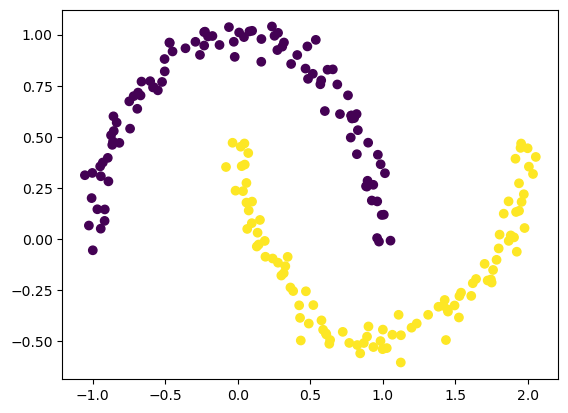

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()